In [1]:
import matplotlib
matplotlib.use("inline")

In [2]:
import umap

C:\Users\demje\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# %pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [156]:
# Collect Images
import requests as rq

for i in range (1, 152):
    data = rq.get(f"https://pokeapi.co/api/v2/pokemon/{i}/").json()
    img = rq.get(data['sprites']['other']['home']['front_default']).content

    with open(f"./pokemon_imgs_home/{i}.png", "wb") as f:
        f.write(img)

In [3]:
# Process images
import cv2
import numpy as np
import glob # regex

imgs = []
names = []

for path in sorted(glob.glob("./pokemon_imgs_home/*.png")):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))

    imgs.append(img)
    names.append(path)



In [4]:
# Feature extraction

import tensorflow as tf

model = tf.keras.applications.ResNet50(
    pooling = 'avg',
    include_top = False,
    
)

In [13]:
def embed(img):
    x = tf.keras.applications.resnet50.preprocess_input(img)
    x = np.expand_dims(x,axis=0)
    return model.predict(x)[0]

embeddings = np.array([embed(img) for img in imgs])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━

In [6]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=97)
X_pca = pca.fit_transform(embeddings)

In [7]:
# clustering
from sklearn.cluster import KMeans

k = 10
clusterer = KMeans(n_clusters=k)
labels = clusterer.fit_predict(X_pca)

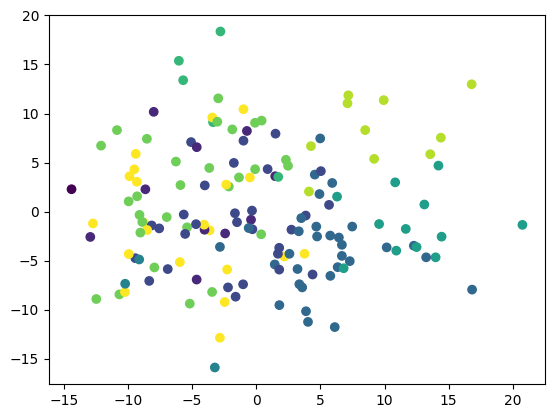

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.show()

In [9]:
print("Starting UMAP…")
umap2d = umap.UMAP(
    n_components=2,
    n_neighbors=10,
    min_dist=0.3,
    n_jobs=-1,
    densmap=False,
    low_memory=True,
    metric='euclidean',
    verbose=True,
    random_state=42
).fit_transform(X_pca)
print("UMAP finished.")

Starting UMAP…
UMAP(min_dist=0.3, n_jobs=1, n_neighbors=10, random_state=42, verbose=True)
Mon Dec  8 19:01:36 2025 Construct fuzzy simplicial set


C:\Users\demje\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Mon Dec  8 19:01:36 2025 Finding Nearest Neighbors
Mon Dec  8 19:01:41 2025 Finished Nearest Neighbor Search
Mon Dec  8 19:01:44 2025 Construct embedding


Epochs completed:  27%| ██▋        134/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:01]

	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Mon Dec  8 19:01:45 2025 Finished embedding
UMAP finished.


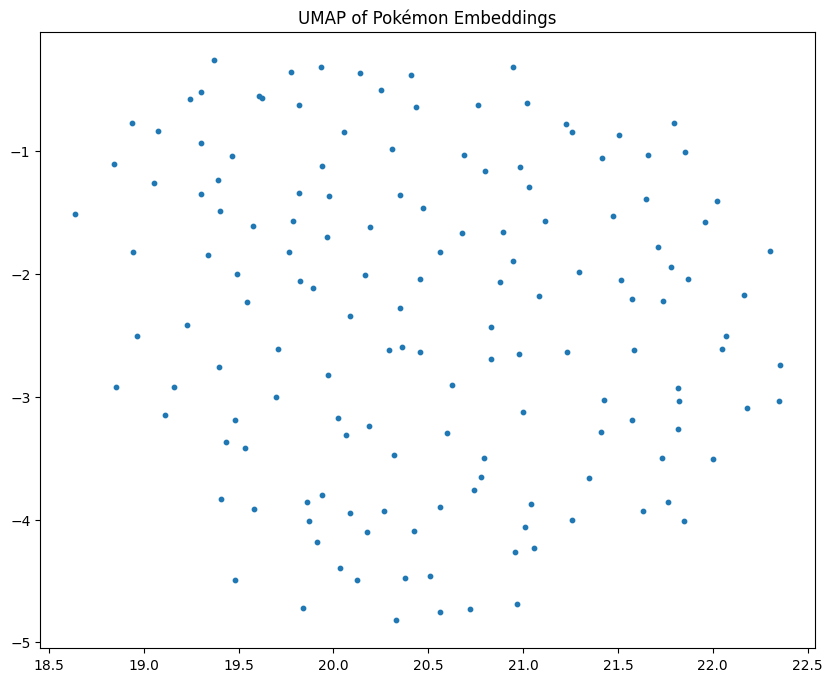

In [10]:
import matplotlib.pyplot as plt

embedding_2d = umap.UMAP(n_components=2).fit_transform(embeddings)
plt.figure(figsize=(10, 8))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=10)
plt.title("UMAP of Pokémon Embeddings")
plt.show()

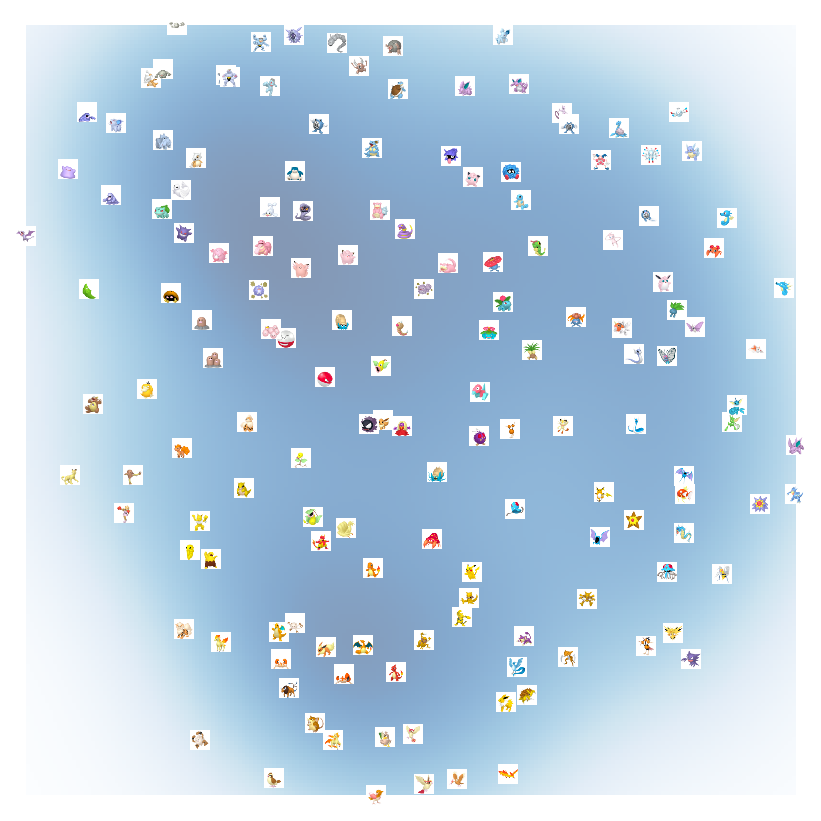

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.stats import gaussian_kde
# 1. Correct RGBA → RGB
def rgba_to_rgb(img):
    if img.shape[2] == 4:
        alpha = img[:, :, 3] / 255.0
        rgb = img[:, :, :3].astype(np.float32)
        rgb = rgb * alpha[..., None] + 255 * (1 - alpha[..., None])
        return np.clip(rgb, 0, 255).astype(np.uint8)
    else:
        return img

imgs_fixed = [rgba_to_rgb(img) for img in imgs]

# 2. Normalize UMAP coordinates to 0–1 to prevent overlap
X = embedding_2d
X_norm = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# 3. Compute density for gradient background using Gaussian KDE
xy = np.vstack([X_norm[:,0], X_norm[:,1]])
z = gaussian_kde(xy)(xy)
# Optional: create a grid for smoother background
xi = np.linspace(0, 1, 200)
yi = np.linspace(0, 1, 200)
xi, yi = np.meshgrid(xi, yi)
zi = gaussian_kde(xy)(np.vstack([xi.ravel(), yi.ravel()]))
zi = zi.reshape(xi.shape)

# Optional downscale for thumbnails
imgs_small = [cv2.resize(img, (48,48), interpolation=cv2.INTER_AREA) for img in imgs_fixed]


# 4. Plot gradient background
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.imshow(
    zi, origin='lower', extent=(0,1,0,1),
    cmap='Blues', alpha=0.5  # alpha controls transparency of gradient
)

for (x0, y0, img) in zip(X_norm[:,0], X_norm[:,1], imgs_small):
    ab = AnnotationBbox(OffsetImage(img, zoom=0.30), (x0, y0), frameon=False)
    ax.add_artist(ab)

plt.axis('off')
plt.show()



=== Cluster -1 (68 Pokémon) ===


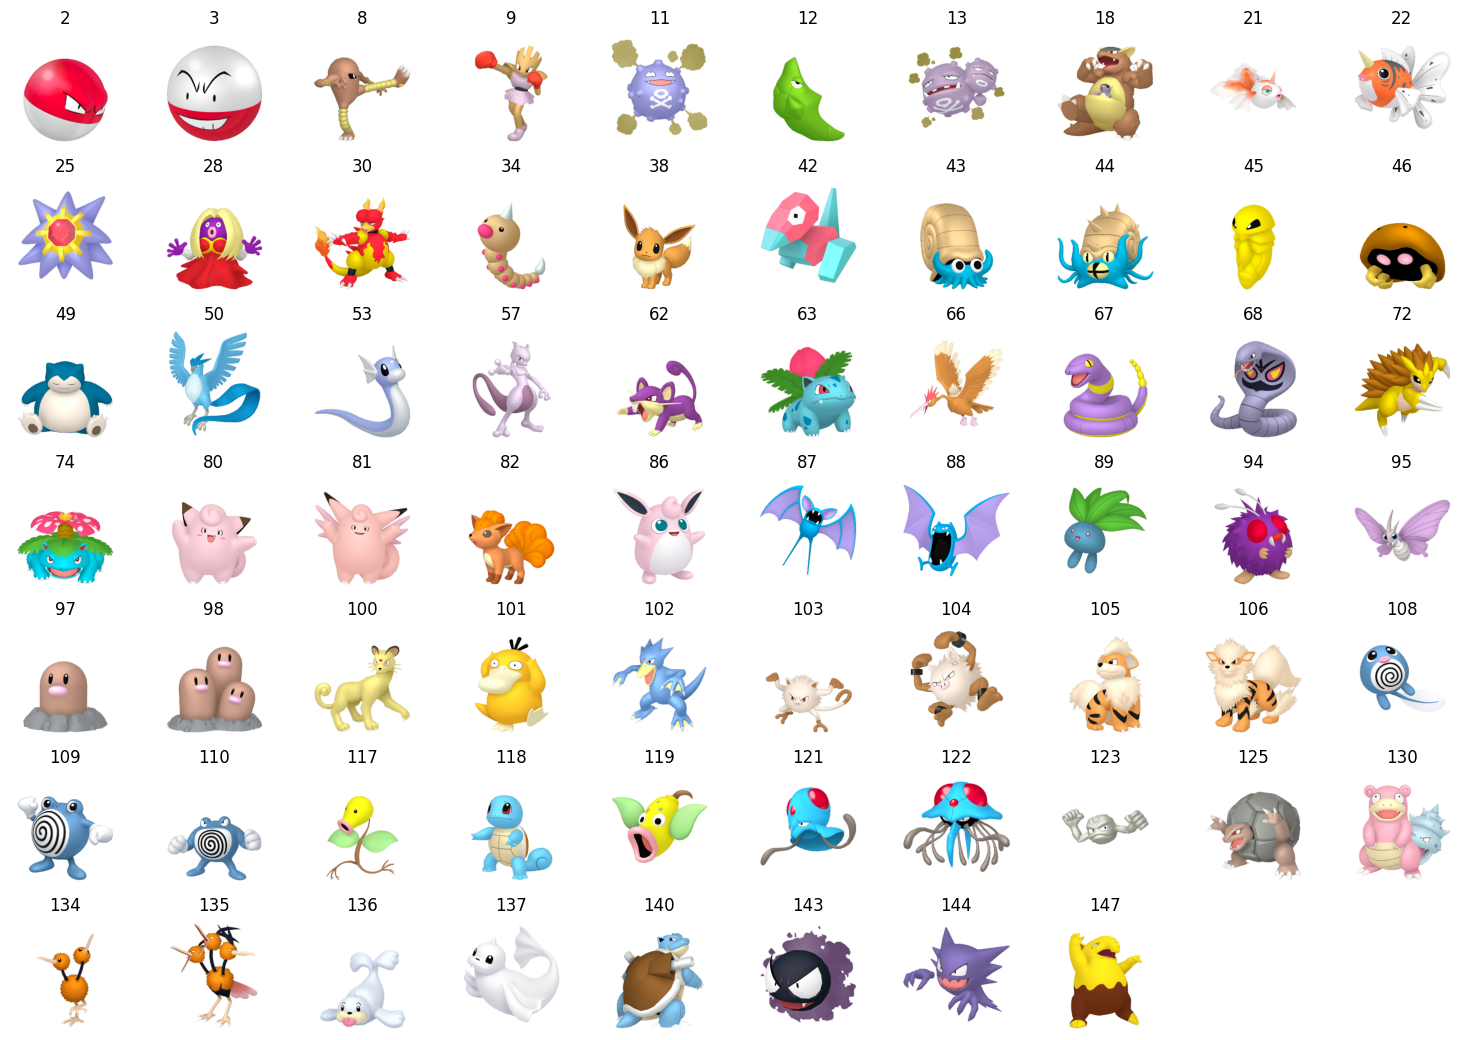


=== Cluster 0 (66 Pokémon) ===


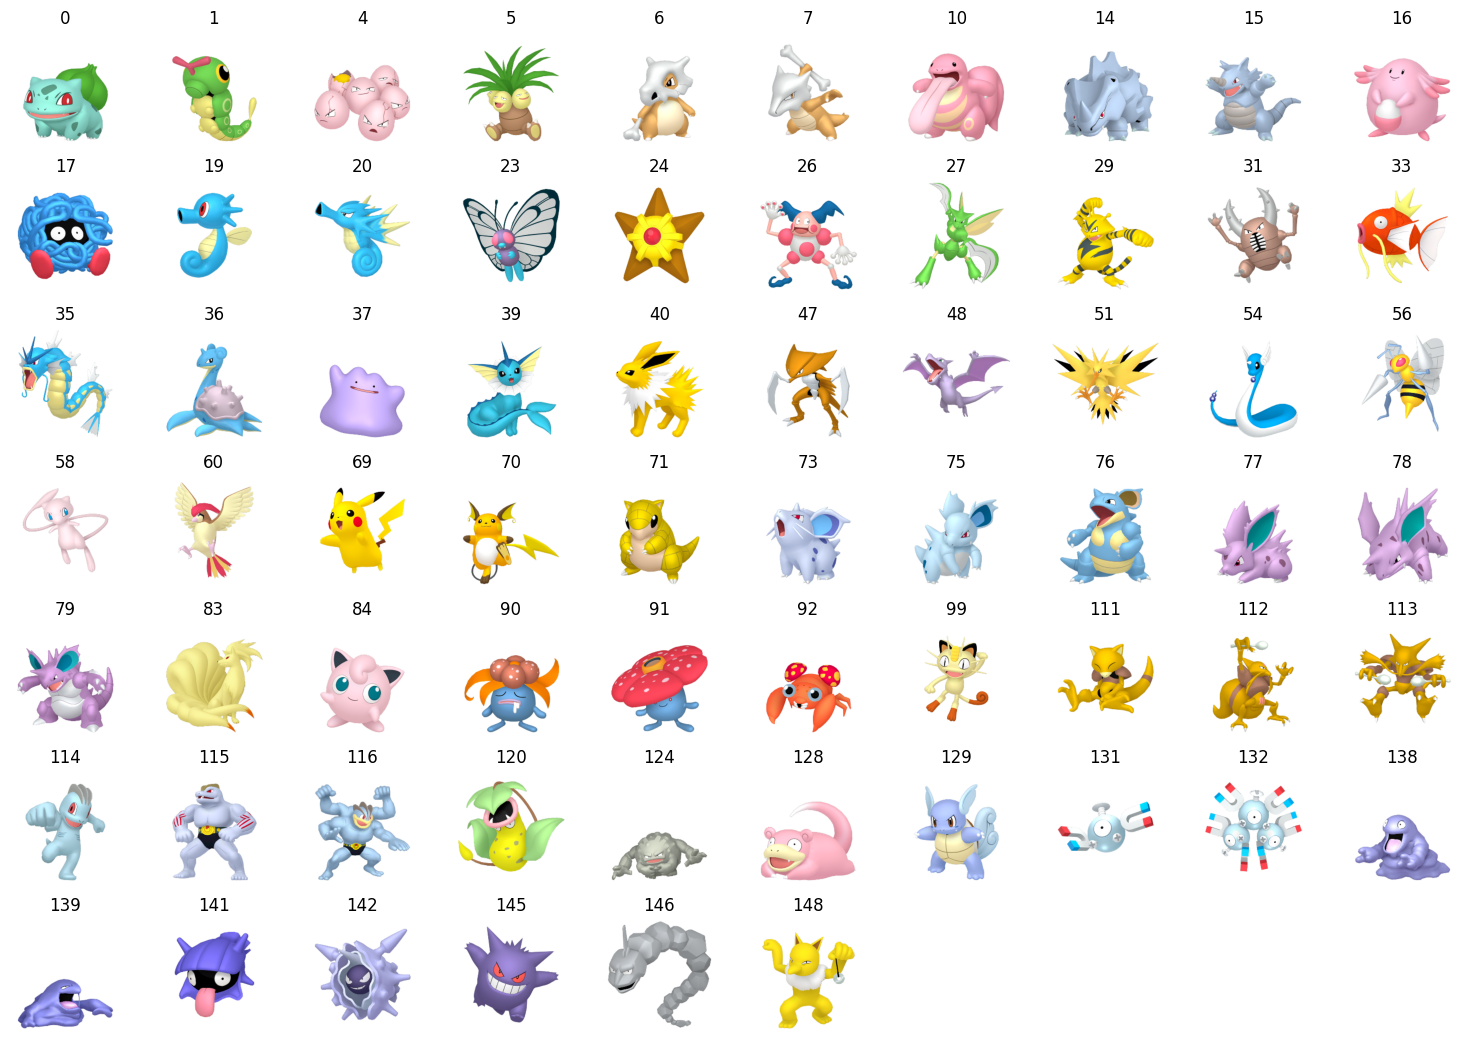


=== Cluster 1 (17 Pokémon) ===


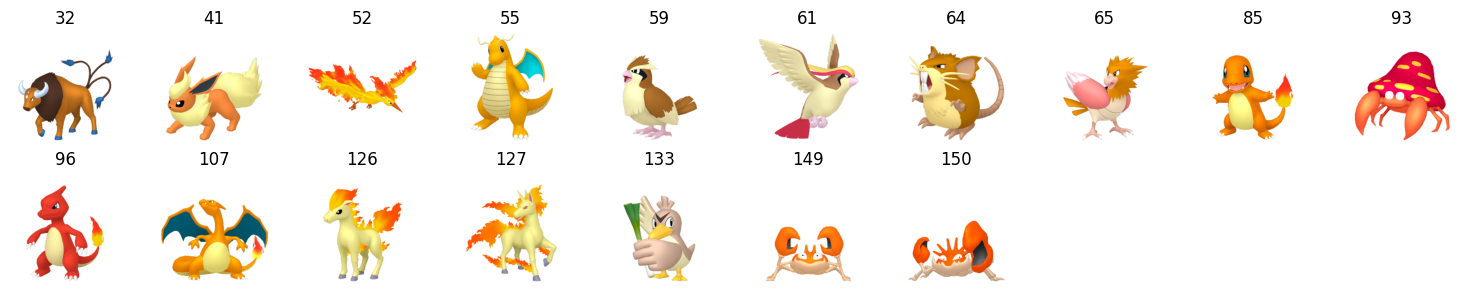

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = np.array(labels)  # ensure it's a NumPy array
unique_clusters = np.unique(labels)

for cluster_id in unique_clusters:
    # get indexes of Pokémon in this cluster
    idxs = np.where(labels == cluster_id)[0]

    print(f"\n=== Cluster {cluster_id} ({len(idxs)} Pokémon) ===")

    # number of images you want per row
    per_row = 10
    rows = int(np.ceil(len(idxs) / per_row))

    plt.figure(figsize=(per_row * 1.5, rows * 1.5))
    
    for i, idx in enumerate(idxs):
        plt.subplot(rows, per_row, i + 1)
        plt.imshow(imgs[idx])      # show image
        plt.axis('off')
        plt.title(str(idx))
    
    plt.tight_layout()
    plt.show()


In [33]:
# alternate approach
umap_clusters = umap.UMAP(n_components=80,random_state=42, metric='cosine').fit_transform(embeddings)

from sklearn.cluster import HDBSCAN
hdbscan_clusterer = HDBSCAN(min_cluster_size=10, metric='euclidean')
labels = hdbscan_clusterer.fit_predict(umap_clusters)

C:\Users\demje\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\demje\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


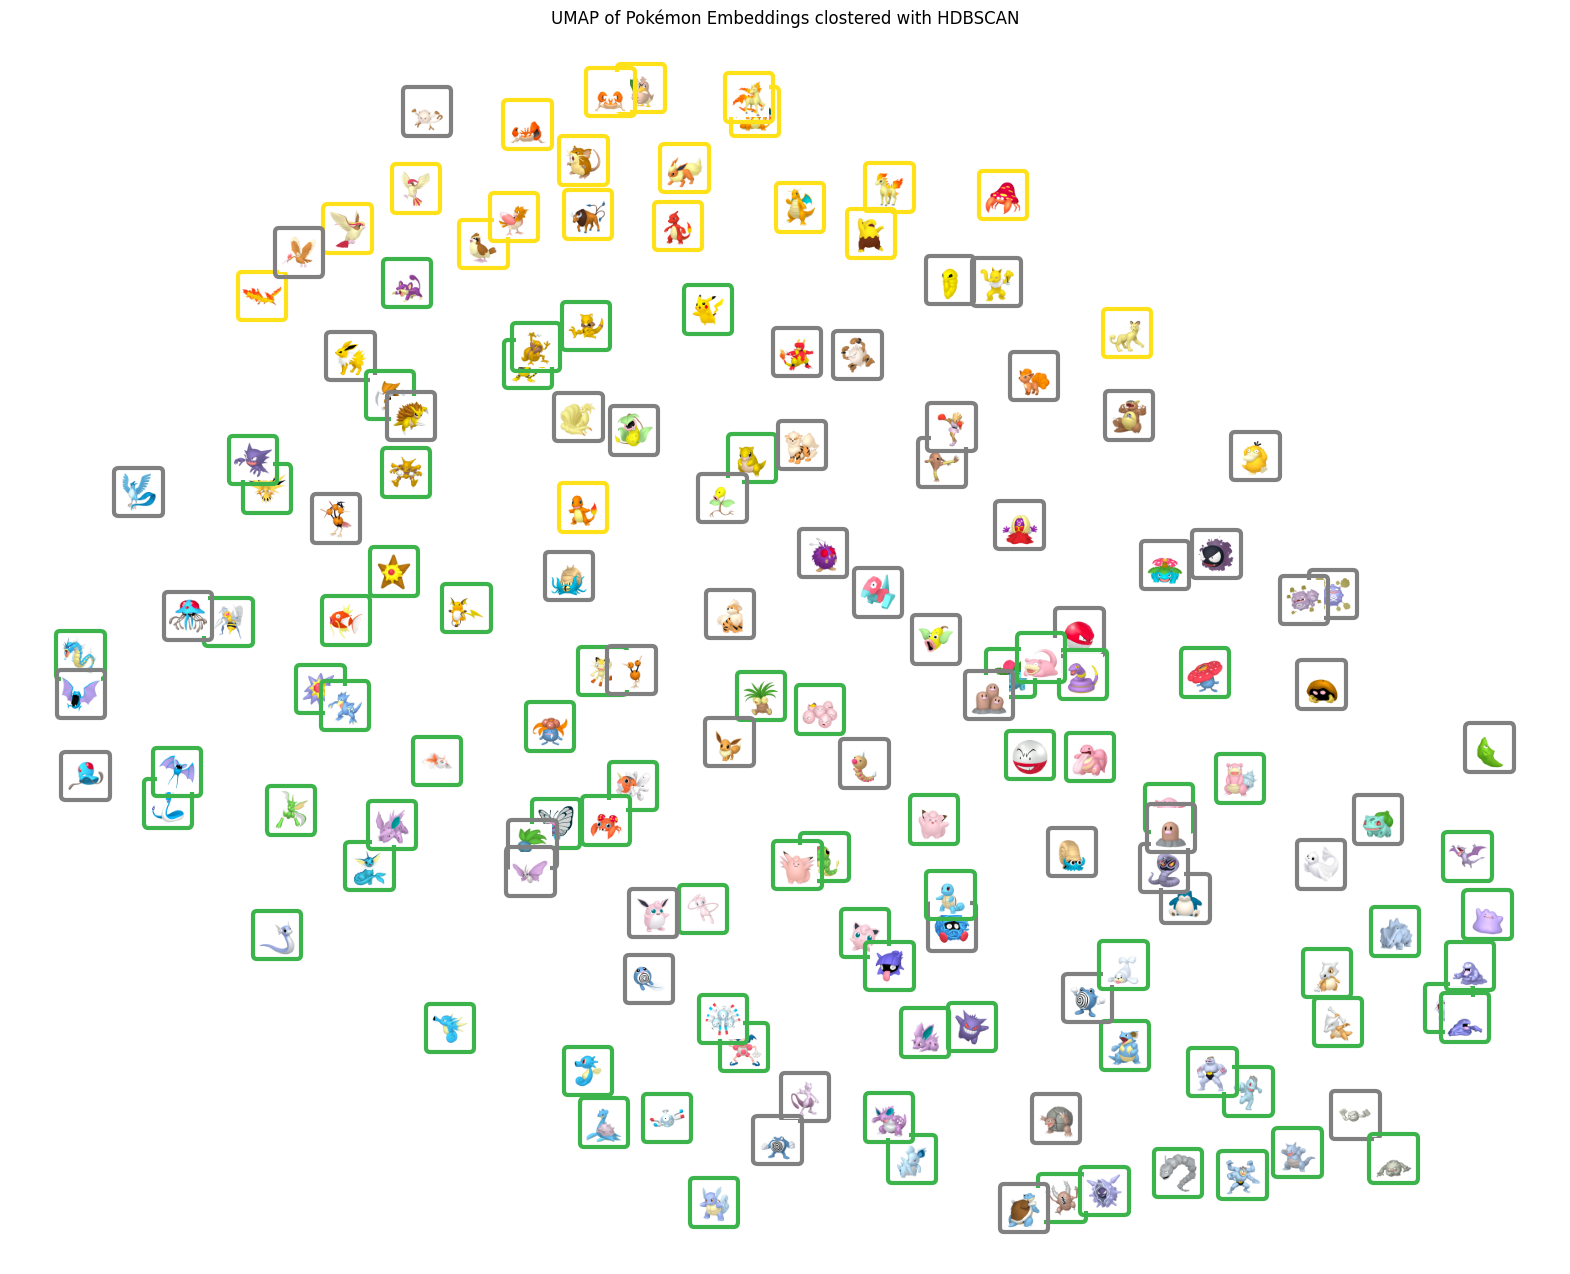

In [34]:
embedding_2d = umap.UMAP(n_components=2, random_state=42).fit_transform(embeddings)
plt.figure(figsize=(20, 16))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=10)
plt.title("UMAP of Pokémon Embeddings clostered with HDBSCAN")
ax = plt.gca()

num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

bright_colors = [
    "#e6194b", "#3cb44b", "#ffe119", "#4363d8",
    "#f58231", "#911eb4", "#46f0f0", "#f032e6",
    "#bcf60c", "#fabebe", "#008080", "#e6beff",
    "#9a6324", "#fffac8", "#800000", "#aaffc3",
    "#808000", "#ffd8b1", "#000075", "#808080"
]
unique_labels = sorted(set(labels))
cluster_colors = {c: bright_colors[i % len(bright_colors)] for i, c in enumerate(unique_labels)}
cluster_colors[-1] = "#000000" 
# Replace -1 (noise) with gray
cluster_colors[-1] = (0.5, 0.5, 0.5, 1.0)

for (x0, y0, img, c) in zip(embedding_2d[:,0], embedding_2d[:,1], imgs_small, labels):
    box = dict(boxstyle="round,pad=0.3", 
               edgecolor=cluster_colors[c], 
               linewidth=3, 
               facecolor="none")
    ab = AnnotationBbox(OffsetImage(img, zoom=0.60), (x0, y0), frameon=True, bboxprops=box)
    ax.add_artist(ab)

plt.axis('off')
plt.show()

In [31]:
# alternate approach
umap_clusters = umap.UMAP(n_components=80,random_state=42, metric='cosine').fit_transform(embeddings)

from sklearn.cluster import KMeans 
clusterer = KMeans(n_clusters=10)
labels = clusterer.fit_predict(umap_clusters)

C:\Users\demje\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\demje\AppData\Roaming\Python\Python310\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


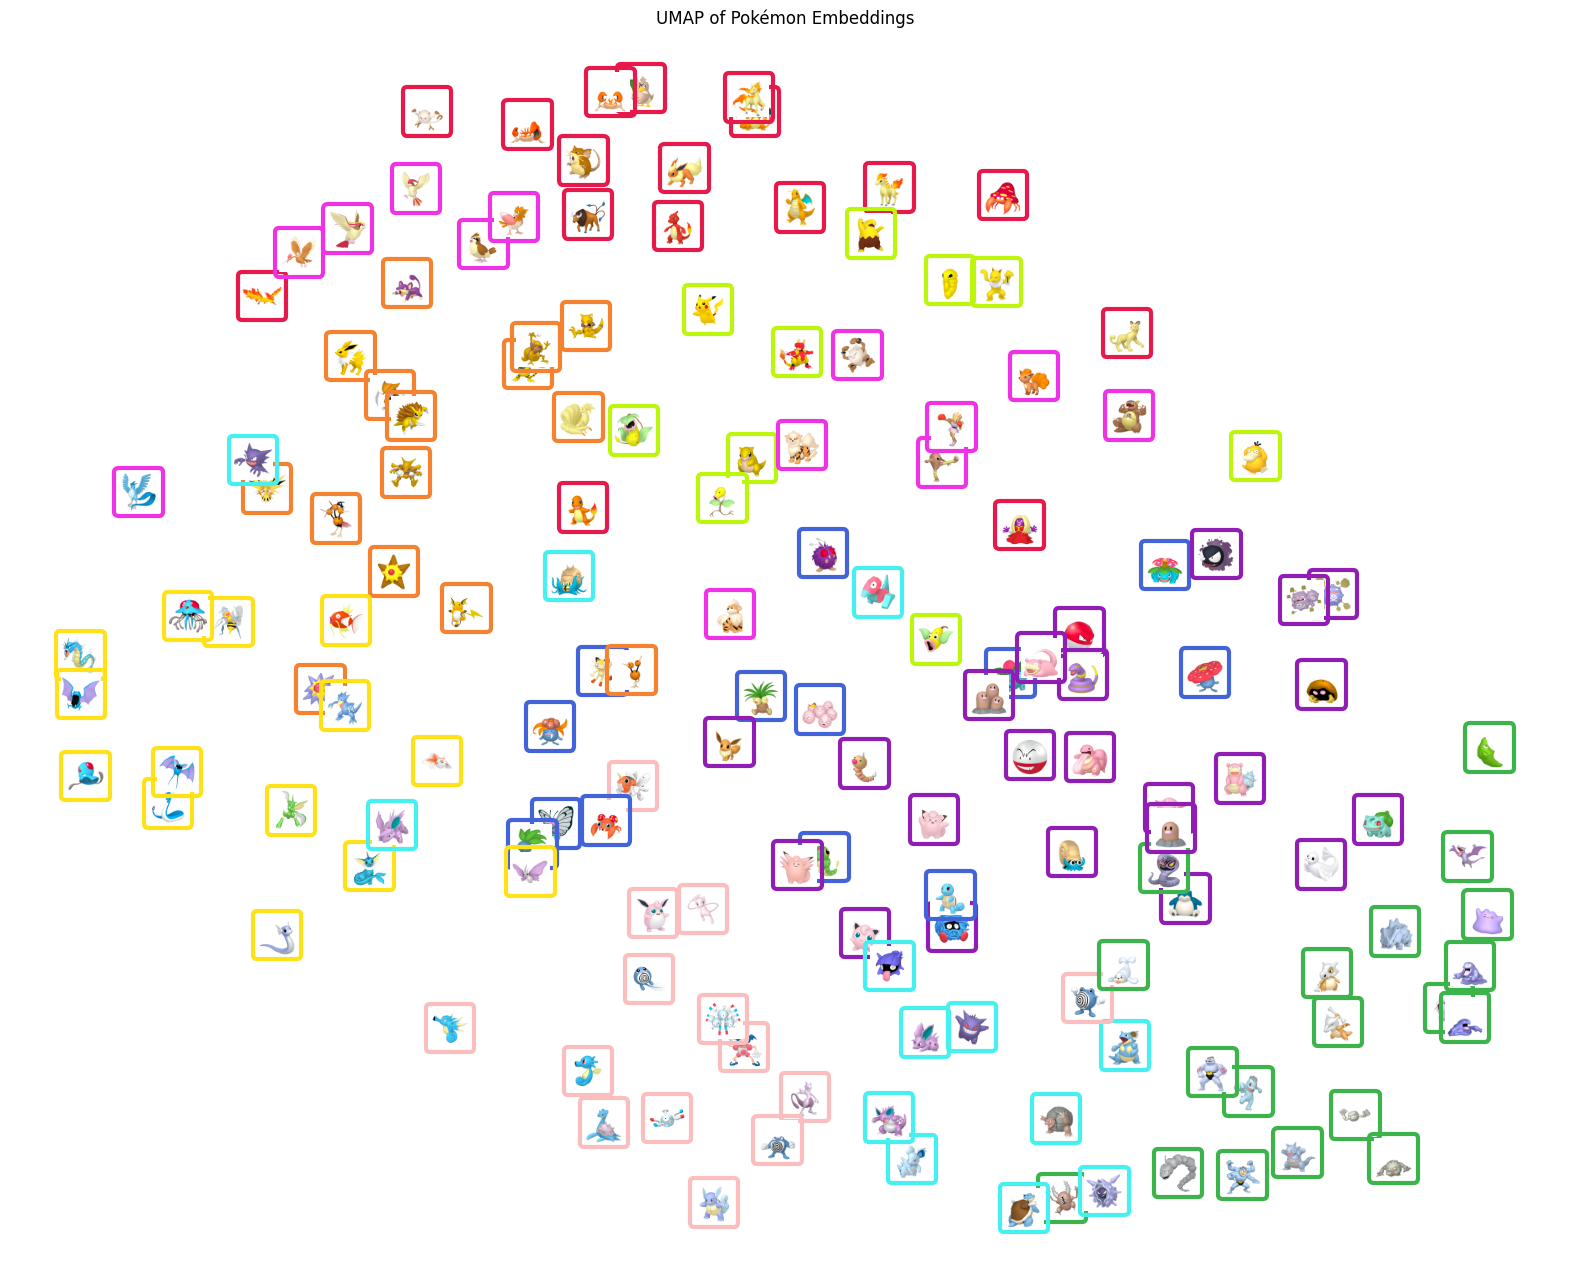

In [ ]:
embedding_2d = umap.UMAP(n_components=2, random_state=42).fit_transform(embeddings)
plt.figure(figsize=(20, 16))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=10)
plt.title("UMAP of Pokémon Embeddings clostered with KMeans")
ax = plt.gca()

num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

bright_colors = [
    "#e6194b", "#3cb44b", "#ffe119", "#4363d8",
    "#f58231", "#911eb4", "#46f0f0", "#f032e6",
    "#bcf60c", "#fabebe", "#008080", "#e6beff",
    "#9a6324", "#fffac8", "#800000", "#aaffc3",
    "#808000", "#ffd8b1", "#000075", "#808080"
]
unique_labels = sorted(set(labels))
cluster_colors = {c: bright_colors[i % len(bright_colors)] for i, c in enumerate(unique_labels)}
cluster_colors[-1] = "#000000" 
# Replace -1 (noise) with gray
cluster_colors[-1] = (0.5, 0.5, 0.5, 1.0)

for (x0, y0, img, c) in zip(embedding_2d[:,0], embedding_2d[:,1], imgs_small, labels):
    box = dict(boxstyle="round,pad=0.3", 
               edgecolor=cluster_colors[c], 
               linewidth=3, 
               facecolor="none")
    ab = AnnotationBbox(OffsetImage(img, zoom=0.60), (x0, y0), frameon=True, bboxprops=box)
    ax.add_artist(ab)

plt.axis('off')
plt.show()